<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#85e0e0;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Ontario Infrastructure (Clustering) </h1></center>    

</div>

# <a name="toc"></a>

<div style="border-radius:10px;
            background-color: #66c2a5;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Table of Contents</h3></center>
</div>

- [1. Introduction and Dataset Features](#Introduction_and_Dataset_Features)
- [2. Import Libraries and Data](#Import_Libraries_and_Data)
- [3. Data Cleaning](#Handling_Missing_Values)
- [4. Outlier Removal & Feature engineering & Exploratory Data Analysis(EDA)](#Prepare1)
- [5. Hierarchical(Agglomerative) Clustering](#Clustering)
- [6. Cluster Result Visualization & Analysis](#Result)
- [7. Power BI Dashboard Preparation](#Output)

<a name='Introduction_and_Dataset_Features'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1. Introduction and Dataset Features</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

**Used Columns:**

* `_id`: Project's unique identifier
* `Category`: Project type(Community, Recreation, etc.)
* `Project Status`: Planning, Complete or Under Construction
* `Target Completion Date`: Planned projects finish time
* `Estimated Total Budget ($)`: Money dedicated for project
* `Municipal Funding`: Yes if project has Municipal Funding, NA if 0 municipal Funding         
* `Provincial Funding`: Yes if project has Provincial Funding, NA if 0 Procincial Funding
* `Federal Funding`: Yes if project has Federal Funding, NA if 0 Federal Funding
* `Other Funding`: Yes if project has Other Funding, NA if 0 Other Funding                                       
* `Latitude`: Accurate location of Project with Longitude
* `Longitude`: Accurate location of Project with Latitude
                                       
**Unused columns:**
* `Supporting Ministry`: Project's supporting Ministry
* `Community`: City that project belongs to geographically
* `Description`: Project explanation, summary
* `Result`: Project Purpose, Usage
* `Area`: Similar to Community
* `Region`: Part of Ontario project belongs to(west, Central, etc)
* `Address`: Project's exact location
* `Postal Code`: Similar to Address
* `Highway / Transit Line`: Mostly NA
* `Website`: Project Information website

<a name='Import_Libraries_and_Data'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
2. Import Libraries and Data</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [33]:
from branca.element import Element
from datetime import datetime
import folium
from folium.plugins import MarkerCluster
from folium import FeatureGroup, LayerControl
import gower
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import re
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sn
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import xlrd

df = pd.read_csv('C:/Users/houju/Desktop/Data_Analysis_SelfLearn/Clustering_DataCamp_Self/Clustering Ontario Project/Ontario_Projects.csv')
df.head()

,_id,Category,Supporting Ministry,Community,Project,Status,Target Completion Date,Description,Result,Area,...,Postal Code,Highway / Transit Line,Estimated Total Budget ($),Municipal Funding,Provincial Funding,Federal Funding,Other Funding,Website,Latitude,Longitude
0,1,Communities,Attorney General,Barrie,Barrie Courthouse - Accessibility,Planning,2025,Reconfiguration of existing CSD space to creat...,Improved accessibility to public areas.,Simcoe,...,L4M 3P2,NaN,0,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1,2,Communities,Attorney General,Brampton,Brampton (A. Grenville and William Davis) Cour...,Complete,23-Dec,Fit-out of the top four floors of the building...,Increased number of courtrooms and associated ...,Peel,...,L6W 4T1,NaN,82500000,NaN,Yes,NaN,NaN,NaN,43.661701,-79.726047
2,3,Communities,Attorney General,Fort Frances,Fort Frances Courthouse - Security Improvements,Planning,2024,Creating single point of entry for all courtho...,Improved security as all courthouse users will...,Rainy River,...,P9A 1C9,NaN,0,NaN,Yes,NaN,NaN,NaN,NaN,NaN
3,4,Communities,Attorney General,Gore Bay,Gore Bay Courthouse - New Courtroom,Planning,To Be Determined,Creating new courtroom that is accessible.,Improved access to justice.,Manitoulin,...,P0P 1H0,NaN,0,NaN,Yes,NaN,NaN,NaN,NaN,NaN
4,5,Communities,Attorney General,Peterborough,Planning for new courthouse in Peterborough,Complete,17-Nov,Plan to replace old courthouse,Plan will inform future Ontario Court of Justi...,Peterborough,...,NaN,NaN,0,NaN,Yes,NaN,NaN,NaN,44.304996,-78.32616


<a name='Handling_Missing_Values'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
3. Data Cleaning</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

### Before Data Cleaning, let's Drop some columns that will not be used, reasons are introducing too much noise, NA or not useful.

In [34]:
# Drop unnecessary columns
drop_cols = ['Community', 'Area', 'Region', 'Website', 'Supporting Ministry','Description', 'Highway / Transit Line', 'Address', 'Postal Code','Project', 'Result']
df.drop(columns=drop_cols, inplace=True)

# Confirm drop
print("Remaining columns:", df.columns.tolist())
print(f"Total rows: {len(df)}")

Remaining columns: ['_id', 'Category', 'Status', 'Target Completion Date', 'Estimated Total Budget ($)', 'Municipal Funding', 'Provincial Funding', 'Federal Funding', 'Other Funding', 'Latitude', 'Longitude']
Total rows: 5632


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   _id                         5632 non-null   int64 
 1   Category                    5632 non-null   object
 2   Status                      5603 non-null   object
 3   Target Completion Date      5632 non-null   object
 4   Estimated Total Budget ($)  5632 non-null   int64 
 5   Municipal Funding           2384 non-null   object
 6   Provincial Funding          5147 non-null   object
 7   Federal Funding             2491 non-null   object
 8   Other Funding               1528 non-null   object
 9   Latitude                    5232 non-null   object
 10  Longitude                   5232 non-null   object
dtypes: int64(2), object(9)
memory usage: 484.1+ KB


In [36]:
df.isna().sum()

_id                              0
Category                         0
Status                          29
Target Completion Date           0
Estimated Total Budget ($)       0
Municipal Funding             3248
Provincial Funding             485
Federal Funding               3141
Other Funding                 4104
Latitude                       400
Longitude                      400
dtype: int64

### There are many NA in the dataset. We'll remove the rows with NA in Status, Latitude and Longitude. Logically, Latitude and Longitude values also needs to make sense, so we'll apply some filter to doublecheck. 

### There are large amount of NA in the funding columns, we'll inspect the dataset as a whole and deal with them.

In [37]:
df = df.dropna(subset=['Status','Latitude','Longitude'])
# Keep only rows where Latitude and Longitude are within world bounds
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df = df[
    (df['Latitude'].between(-90, 90)) & 
    (df['Longitude'].between(-180, 180))
]

In [38]:
df.applymap(type).nunique()

C:\Users\houju\AppData\Local\Temp\ipykernel_49244\2561811571.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(type).nunique()


_id                           1
Category                      1
Status                        1
Target Completion Date        1
Estimated Total Budget ($)    1
Municipal Funding             2
Provincial Funding            2
Federal Funding               2
Other Funding                 2
Latitude                      1
Longitude                     1
dtype: int64

### We'll inspect every column for observation and modification.

In [39]:
inspectdf = df.copy()
drop_ = ['_id','Latitude', 'Longitude']
inspectdf.drop(columns = drop_, inplace=True)
for column in inspectdf.columns:
    unique_vals = inspectdf[column].unique()
    print(f"Unique values in column '{column}': {unique_vals}")

Unique values in column 'Category': ['Communities' 'Education' 'Child care' 'Health care' 'Recreation'
 'Roads and bridges' 'Transit']
Unique values in column 'Status': ['Complete' 'Under construction' 'Planning']
Unique values in column 'Target Completion Date': ['23-Dec' '17-Nov' '19-Jul' '23-Jan' '22-Dec' '24-Oct' '18-Apr' '18-Jan'
 '26-Sep' '17-Jul' '16-Mar' '17-Mar' '15-Oct' '18-Mar' '25-Sep' '17-Jun'
 '18-Feb' '27-Nov' '25-Oct' '16-Oct' '18-Oct' '16-Sep' '21-Mar' '19-Jan'
 '16-Nov' '18-Jul' '18-May' '18-Nov' '16-Dec' '18-Dec' '15-May' '15-Apr'
 '19-Feb' '19-Aug' '15-Dec' '18-Aug' '16-Apr' '21-Oct' '18-Sep' '18-Jun'
 '17-Sep' '21-Sep' '20-Oct' '22-Jan' '22-Oct' '24-Sep' '22-Feb' '22-Apr'
 '19-Sep' '20-Sep' '22-Sep' '21-Jan' '25-Jan' '20-Dec' '24-Jul' '22-Mar'
 '23-Sep' '20-Nov' '22-Jun' '26-Mar' '20-Mar' '20-Jan' '23-Jun' '21-Feb'
 '24-Dec' '24-Feb' '21-Apr' '24-Apr' '24-Jan' '21-Nov' '19-May' '21-Dec'
 '25-Feb' '24-Mar' '23-Feb' '28-Sep' '26-Jul' '24-Jun' '23-Mar' '23-Aug'
 '2025

### From the above cell, we can confirm the following:

#### - Changing all nan from funding columns to 0, indicating no funding from this category.
#### - Target Completion Date contains very complicated dates in different forms.
#### - All rest columns are fine, as they also contain only 1 unique datatype.

In [40]:
df['Provincial Funding'] = df['Provincial Funding'].fillna(0)
df['Federal Funding'] = df['Federal Funding'].fillna(0)
df['Other Funding'] = df['Other Funding'].fillna(0)
df['Municipal Funding'] = df['Municipal Funding'].fillna(0)
columns_to_change = ['Municipal Funding', 'Provincial Funding', 'Federal Funding', 'Other Funding']

# Replace 'Yes' with 1 in all specified columns
df[columns_to_change] = df[columns_to_change].replace('Yes', 1)

drop_list = ['To Be Determined', 'Jan-99', 'Mar-36','Sep-31', 'Oct-32', 'Aug-32','Jul-33',
 'Mar-33','Jun-32','Mar-32','0','Oct-33']
df= df[~df['Target Completion Date'].isin(drop_list)]
print(f"Total rows: {len(df)}")
df.head()

Total rows: 4909


C:\Users\houju\AppData\Local\Temp\ipykernel_49244\601759828.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_change] = df[columns_to_change].replace('Yes', 1)


,_id,Category,Status,Target Completion Date,Estimated Total Budget ($),Municipal Funding,Provincial Funding,Federal Funding,Other Funding,Latitude,Longitude
1,2,Communities,Complete,23-Dec,82500000,0,1,0,0,43.661701,-79.726047
4,5,Communities,Complete,17-Nov,0,0,1,0,0,44.304996,-78.326160
7,8,Communities,Complete,19-Jul,0,0,1,0,0,43.662665,-79.385172
8,9,Communities,Complete,23-Jan,956400000,0,1,0,0,43.653618,-79.386200
9,10,Communities,Complete,22-Dec,82500000,0,1,0,0,43.752606,-79.536505


### We have 4909 out of 5632 columns now, which is acceptable. Now let's handle the messy dates and visualize the distribution

In [41]:
def clean_date(date_val, current_year=datetime.now().year):
    
    # Handle Excel 5-digit serial dates (e.g., 43024 → 2017-10-11)
    if str(date_val).isdigit() and len(str(date_val)) == 5:
        date_val = int(date_val)
        date_full = xlrd.xldate_as_datetime(date_val, 0)
        myyear = date_full.year
        return int(myyear)
    
    # Handle year-only (e.g., "2025" → 2025)
    if isinstance(date_val, (int, float)) or str(date_val).isdigit():
        return int(date_val)
    
    # Handle year ranges (e.g., "2026-2027" → 2027)
    if isinstance(date_val, str) and '-' in date_val and len(date_val.split('-')) == 2:
        start, end = date_val.split('-')
        if start.isdigit() and end.isdigit():
            return int(end)
    
    # Handle specific entries
    if date_val == 'Summer 2019' :
        return 2019
    if date_val == 'Spring 2023' :
        return 2023
    if date_val == 'Mid/Late 2022' :
        return 2022
    # Handle Pure Date
    for fmt in ('%y-%b','%b-%y'):
        return 2025

# Apply cleaning and remove invalid rows
df['Target Completion Date'] = df['Target Completion Date'].apply(clean_date)

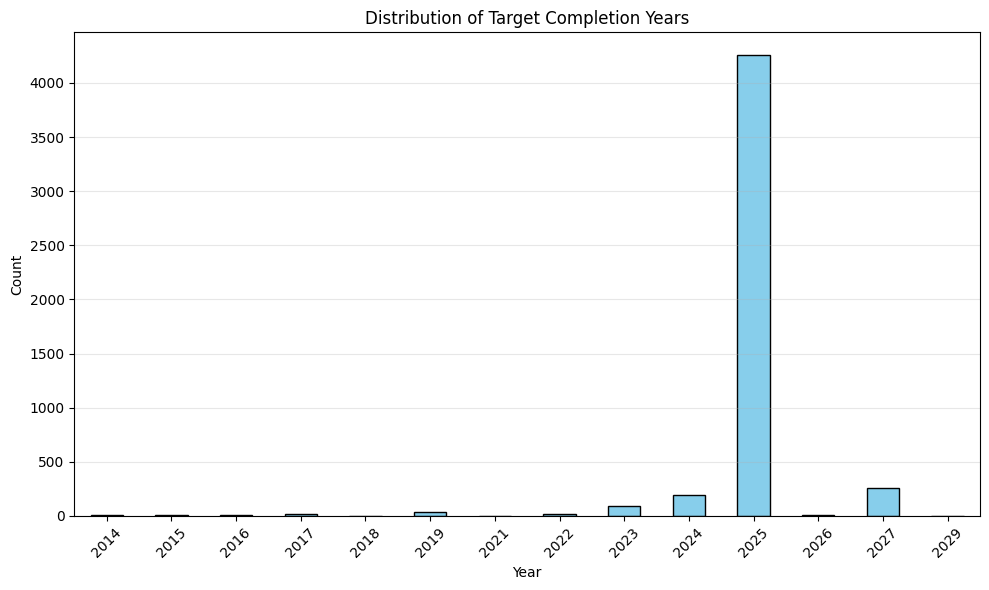

In [42]:
# Plot histogram of year strings
plt.figure(figsize=(10, 6))
df['Target Completion Date'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Target Completion Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 87% of our data are in 2025. We'll look at distributions of other columns without 2025 data for inspection.

In [43]:
temp_df = df[df['Target Completion Date'] != 2025]
# Status distribution
print("📊 Status Value Counts without 2025:")
print(temp_df['Status'].value_counts(dropna=False))

print("📊 Status Value Counts with 2025:")
print(df['Status'].value_counts(dropna=False))

# Category distribution
print("\n📊 Category Value Counts:")
print(temp_df['Category'].value_counts(dropna=False))

# Funding distribution
print("\n📊 Provincial Funding Value Counts:")
print(temp_df['Provincial Funding'].value_counts(dropna=False))

print("\n📊 Federal Funding Value Counts:")
print(temp_df['Federal Funding'].value_counts(dropna=False))

print("\n📊 Municipal Funding Value Counts:")
print(temp_df['Municipal Funding'].value_counts(dropna=False))

print("\n📊 Other Funding Value Counts:")
print(temp_df['Other Funding'].value_counts(dropna=False))

📊 Status Value Counts without 2025:
Status
Planning              427
Under construction    143
Complete               84
Name: count, dtype: int64
📊 Status Value Counts with 2025:
Status
Complete              3643
Planning               869
Under construction     397
Name: count, dtype: int64

📊 Category Value Counts:
Category
Roads and bridges    392
Transit               93
Recreation            86
Communities           81
Health care            2
Name: count, dtype: int64

📊 Provincial Funding Value Counts:
Provincial Funding
1    516
0    138
Name: count, dtype: int64

📊 Federal Funding Value Counts:
Federal Funding
0    461
1    193
Name: count, dtype: int64

📊 Municipal Funding Value Counts:
Municipal Funding
0    465
1    189
Name: count, dtype: int64

📊 Other Funding Value Counts:
Other Funding
0    603
1     51
Name: count, dtype: int64


### We can see that most projects not in 2025 are incomplete when compared to 2025 projects. Therefore, we'll only keep 2025 projects. We have 4255 rows left.

In [44]:
# Keep only rows where the year is 2025
df = df[df['Target Completion Date'] == 2025]
df = df.rename(columns={'Target Completion Date': 'Target_Year'})
print(f"Total rows: {len(df)}")
print(df.dtypes)

Total rows: 4255
_id                             int64
Category                       object
Status                         object
Target_Year                     int64
Estimated Total Budget ($)      int64
Municipal Funding               int64
Provincial Funding              int64
Federal Funding                 int64
Other Funding                   int64
Latitude                      float64
Longitude                     float64
dtype: object


In [45]:
cols = df.columns.tolist()
cols.remove('Target_Year')
new_column_order = cols + ['Target_Year']

df = df[new_column_order]
df.to_csv("C:/Users/houju/Desktop/Data_Analysis_SelfLearn/Clustering_DataCamp_Self/Clustering Ontario Project/Final_Ontario_Project.csv", index=False)
df.head()

,_id,Category,Status,Estimated Total Budget ($),Municipal Funding,Provincial Funding,Federal Funding,Other Funding,Latitude,Longitude,Target_Year
1,2,Communities,Complete,82500000,0,1,0,0,43.661701,-79.726047,2025
4,5,Communities,Complete,0,0,1,0,0,44.304996,-78.326160,2025
7,8,Communities,Complete,0,0,1,0,0,43.662665,-79.385172,2025
8,9,Communities,Complete,956400000,0,1,0,0,43.653618,-79.386200,2025
9,10,Communities,Complete,82500000,0,1,0,0,43.752606,-79.536505,2025


### The above data cleaning progress had been double checked by Excel power query:
![Data_Clean_Query.png](Data_Clean_Query.png)

<a name='Prepare1'></a>

<div style= 'border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;'>

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
4. Outlier Removal & Feature Engineering & Exploratory Data Analysis(EDA) </h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

### First we'll observe distribution from each column in our cleaned dataset.

In [46]:
Ori_df = pd.read_csv("C:/Users/houju/Desktop/Data_Analysis_SelfLearn/Clustering_DataCamp_Self/Clustering Ontario Project/Final_Ontario_Project.csv")
# Status distribution
print("📊 Status Value Counts:")
print(Ori_df['Status'].value_counts(dropna=False))

# Category distribution
print("\n📊 Category Value Counts:")
print(Ori_df['Category'].value_counts(dropna=False))

# Funding distribution
print("\n📊 Provincial Funding Value Counts:")
print(Ori_df['Provincial Funding'].value_counts(dropna=False))

print("\n📊 Federal Funding Value Counts:")
print(Ori_df['Federal Funding'].value_counts(dropna=False))

print("\n📊 Municipal Funding Value Counts:")
print(Ori_df['Municipal Funding'].value_counts(dropna=False))

print("\n📊 Other Funding Value Counts:")
print(Ori_df['Other Funding'].value_counts(dropna=False))

📊 Status Value Counts:
Status
Complete              3559
Planning               442
Under construction     254
Name: count, dtype: int64

📊 Category Value Counts:
Category
Communities          2056
Education             734
Roads and bridges     522
Recreation            323
Child care            314
Health care           163
Transit               143
Name: count, dtype: int64

📊 Provincial Funding Value Counts:
Provincial Funding
1    4136
0     119
Name: count, dtype: int64

📊 Federal Funding Value Counts:
Federal Funding
0    2153
1    2102
Name: count, dtype: int64

📊 Municipal Funding Value Counts:
Municipal Funding
0    2250
1    2005
Name: count, dtype: int64

📊 Other Funding Value Counts:
Other Funding
0    2854
1    1401
Name: count, dtype: int64


### For the Status column, planning and under construction values are quiet low. We will combine these two categories. Almost every project has provincial funding, we'll perform some EDA to decide if we should remove it from our analysis.

In [47]:
Ori_df['Status'] = Ori_df['Status'].apply(lambda x: "Complete" if x == 'Complete' else "Incomplete")

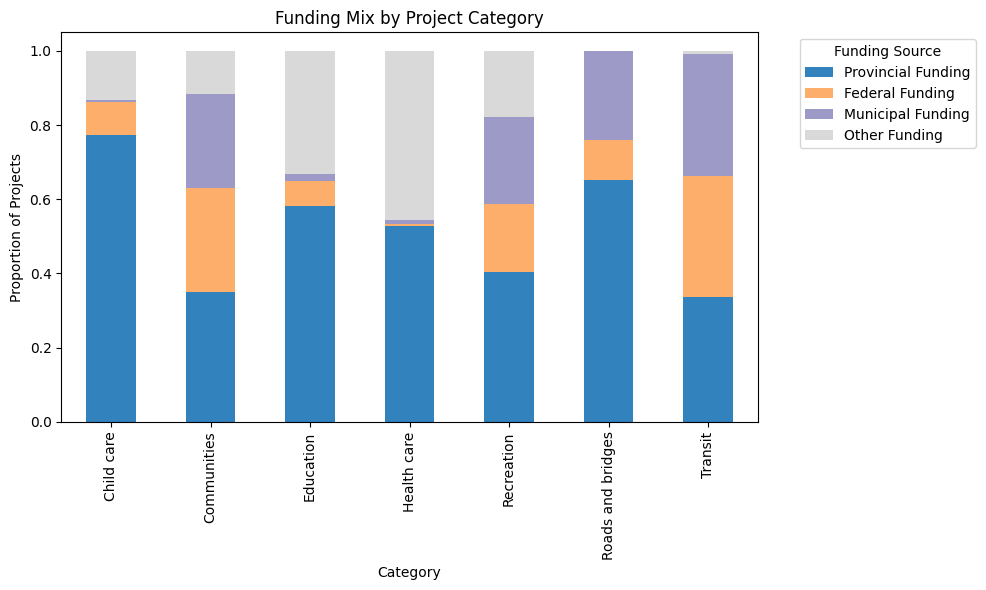

In [48]:
# Extract category columns
category_cols = [col for col in Ori_df.columns if col.startswith("Category_")]

category_funding = Ori_df.groupby('Category').agg({
    'Provincial Funding': 'sum',
    'Federal Funding': 'sum',
    'Municipal Funding': 'sum',
    'Other Funding': 'sum'
})

# Normalize to percentage
category_funding_pct = category_funding.div(category_funding.sum(axis=1), axis=0)

category_funding_pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20c')
plt.title('Funding Mix by Project Category')
plt.ylabel('Proportion of Projects')
plt.xlabel('Category')
plt.legend(title='Funding Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\houju\AppData\Local\Temp\ipykernel_49244\4188346226.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda row: '+'.join([label for i, label in enumerate(['Federal', 'Municipal', 'Other']) if row[i] == 1]),


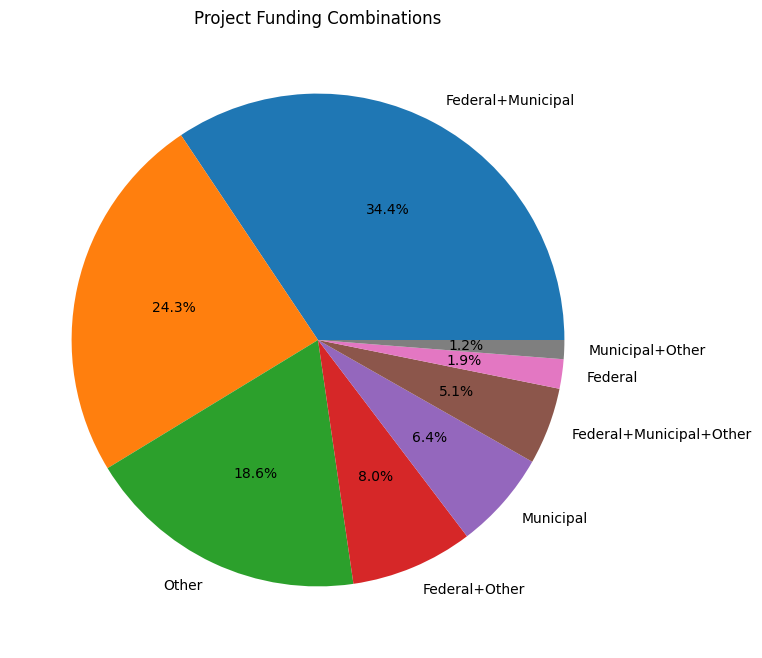

In [49]:
# Create a string to represent funding combo per row
Ori_df['Funding_Combo'] = Ori_df[['Federal Funding', 'Municipal Funding', 'Other Funding']].apply(
    lambda row: '+'.join([label for i, label in enumerate(['Federal', 'Municipal', 'Other']) if row[i] == 1]),
    axis=1
)

# Count combos
combo_counts = Ori_df['Funding_Combo'].value_counts()

combo_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), ylabel='', title='Project Funding Combinations')
plt.show()

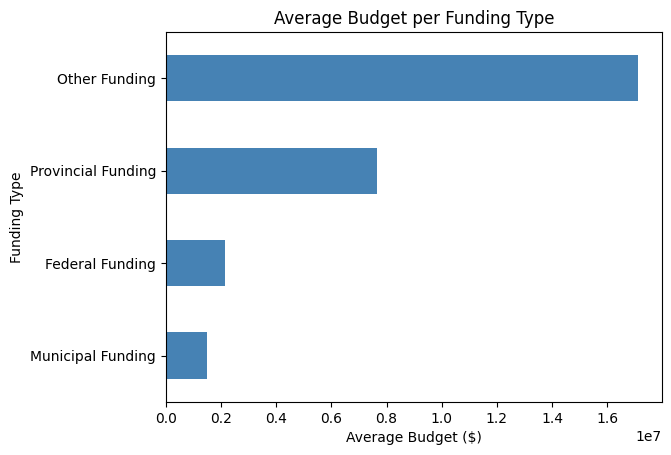

In [50]:
# Change funding flags into long format
funding_cols = ['Federal Funding', 'Provincial Funding', 'Municipal Funding', 'Other Funding']
df_melt = Ori_df.melt(id_vars=['Estimated Total Budget ($)'], value_vars=funding_cols,
                  var_name='Funding Type', value_name='Has Funding')

# Filter only rows with funding
df_melt = df_melt[df_melt['Has Funding'] == 1]
avg_budget = df_melt.groupby('Funding Type')['Estimated Total Budget ($)'].mean().sort_values()
avg_budget.plot(kind='barh', color='steelblue', title='Average Budget per Funding Type')
plt.xlabel('Average Budget ($)')
plt.show()

### From EDA, provincial funding shows really limited information. So we will drop it, we'll also drop latitude, longitude, id, Target_Year.

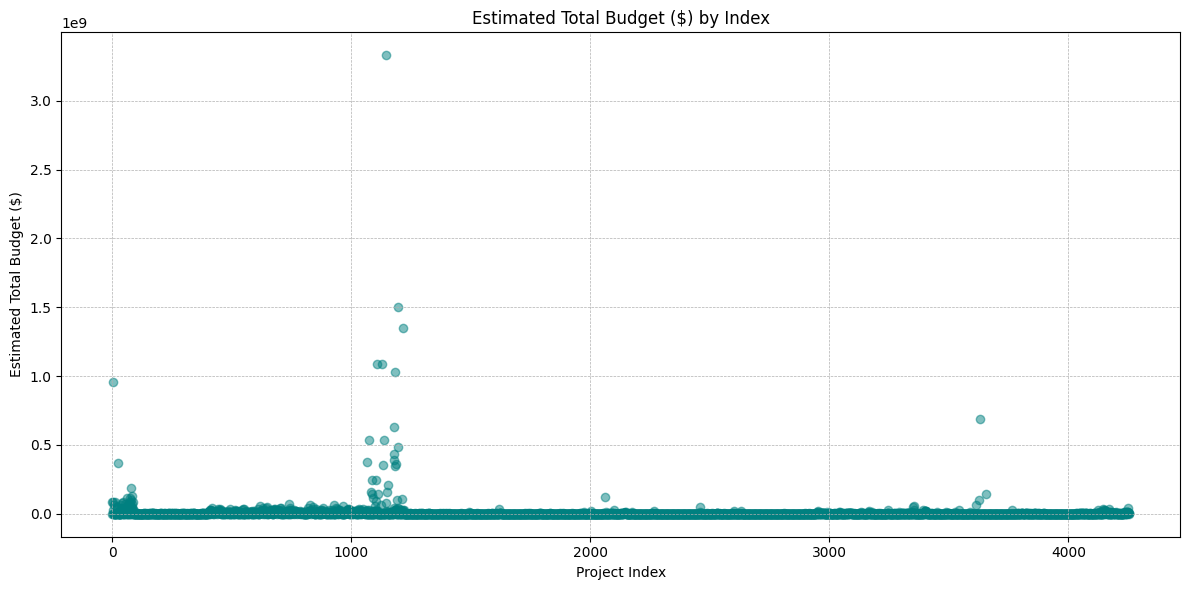

In [51]:

Ori_df = Ori_df.drop(['_id', 'Latitude', 'Longitude','Target_Year','Provincial Funding'], axis=1)
plt.figure(figsize=(12, 6))
plt.scatter(
    x=range(len(Ori_df)),
    y=Ori_df['Estimated Total Budget ($)'],
    alpha=0.5,
    color='teal'
)

plt.title('Estimated Total Budget ($) by Index')
plt.xlabel('Project Index')
plt.ylabel('Estimated Total Budget ($)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [52]:
# Set the upper threshold, 0.25 billion
threshold = 2.5e8  

# Check how many rows will be deleted
num_outliers = Ori_df[Ori_df['Estimated Total Budget ($)'] > threshold].shape[0]
print(f"Number of rows to be removed: {num_outliers}")

# Filter out the outliers
Ori_df_cleaned = Ori_df[Ori_df['Estimated Total Budget ($)'] <= threshold].copy()

# Confirm the new shape
print(f"Original row count: {Ori_df.shape[0]}")
print(f"Cleaned row count: {Ori_df_cleaned.shape[0]}")

Number of rows to be removed: 19
Original row count: 4255
Cleaned row count: 4236


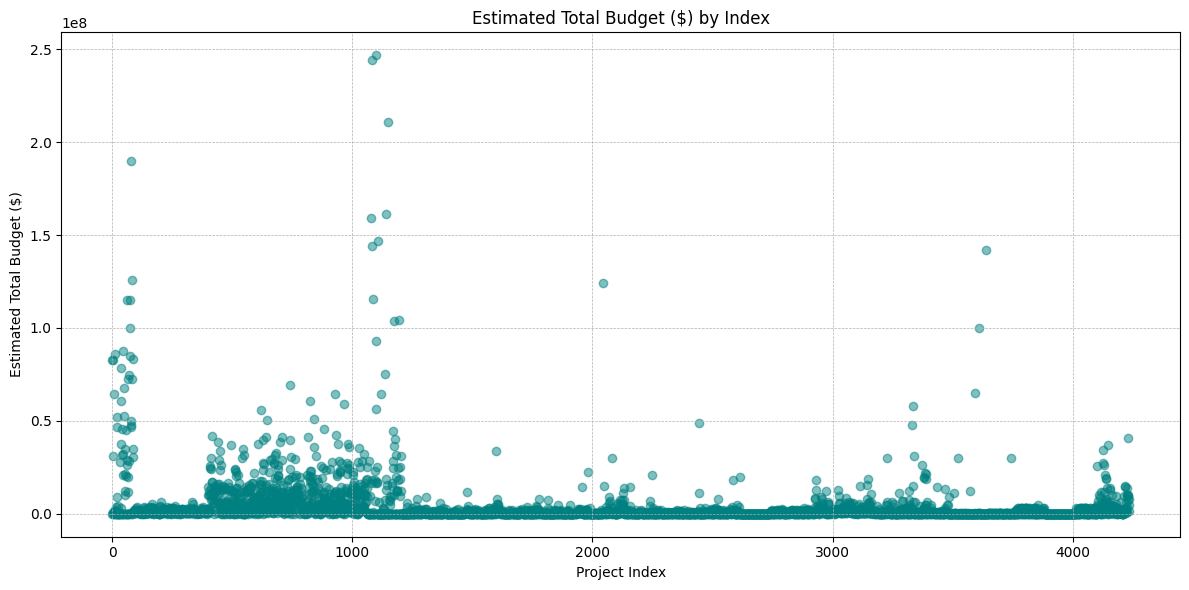

In [53]:
Ori_df = Ori_df_cleaned
plt.figure(figsize=(12, 6))
plt.scatter(
    x=range(len(Ori_df)),
    y=Ori_df['Estimated Total Budget ($)'],
    alpha=0.5,
    color='teal'
)

plt.title('Estimated Total Budget ($) by Index')
plt.xlabel('Project Index')
plt.ylabel('Estimated Total Budget ($)')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [54]:
# Set the upper threshold 0.05 billion
threshold = 0.5e8 

# Check how many rows will be deleted
num_outliers = Ori_df[Ori_df['Estimated Total Budget ($)'] > threshold].shape[0]
print(f"Number of rows to be removed: {num_outliers}")

# Filter out the outliers
Ori_df_cleaned = Ori_df[Ori_df['Estimated Total Budget ($)'] <= threshold].copy()

# Confirm the new shape
print(f"Original row count: {Ori_df.shape[0]}")
print(f"Cleaned row count: {Ori_df_cleaned.shape[0]}")


Number of rows to be removed: 46
Original row count: 4236
Cleaned row count: 4190


### We have finished removing outliers. Now we'll do some final modifications to prepare for clustering.

In [55]:
Ori_df = Ori_df_cleaned
Ori_df['Category'] = pd.Categorical(Ori_df['Category'], categories=['Transit','Communities', 'Education', 'Child care', 'Roads and bridges', 'Recreation', 
                                                      'Health care'])
Ori_df = pd.get_dummies(Ori_df[[
    'Estimated Total Budget ($)',
    'Status', 'Category',
    'Federal Funding',
    'Municipal Funding',
    'Other Funding',
]], columns=['Status', 'Category'], drop_first=False)
Ori_df['Estimated Total Budget ($)'] = Ori_df['Estimated Total Budget ($)'].astype(float)
Ori_df.head()
print(Ori_df.dtypes)

Estimated Total Budget ($)    float64
Federal Funding                 int64
Municipal Funding               int64
Other Funding                   int64
Status_Complete                  bool
Status_Incomplete                bool
Category_Transit                 bool
Category_Communities             bool
Category_Education               bool
Category_Child care              bool
Category_Roads and bridges       bool
Category_Recreation              bool
Category_Health care             bool
dtype: object


In [56]:
# Convert all boolean columns to 0/1
bool_cols = Ori_df.select_dtypes('bool').columns
Ori_df[bool_cols] = Ori_df[bool_cols].astype(int)
print(Ori_df.dtypes)

Estimated Total Budget ($)    float64
Federal Funding                 int64
Municipal Funding               int64
Other Funding                   int64
Status_Complete                 int32
Status_Incomplete               int32
Category_Transit                int32
Category_Communities            int32
Category_Education              int32
Category_Child care             int32
Category_Roads and bridges      int32
Category_Recreation             int32
Category_Health care            int32
dtype: object


In [57]:
Ori_df.head()

,Estimated Total Budget ($),Federal Funding,Municipal Funding,Other Funding,Status_Complete,Status_Incomplete,Category_Transit,Category_Communities,Category_Education,Category_Child care,Category_Roads and bridges,Category_Recreation,Category_Health care
1,0.0,0,0,0,1,0,0,1,0,0,0,0,0
2,0.0,0,0,0,1,0,0,1,0,0,0,0,0
5,31000000.0,1,0,1,1,0,0,1,0,0,0,0,0
6,1200000.0,0,0,0,1,0,0,1,0,0,0,0,0
8,0.0,0,0,1,0,1,0,1,0,0,0,0,0


<a name='Clustering'></a>

<div style= 'border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;'>

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
5. Hierarchical(Agglomerative) clustering</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

### For Hierarchical Clustering, plotting dendrograms are essential to visualize the number of clusters to select and quality of clusters. 
#### Ward does not work with gower, so we will check Complete and Average Linkage.

C:\Users\houju\AppData\Local\Temp\ipykernel_49244\960143157.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_dist, method='complete')


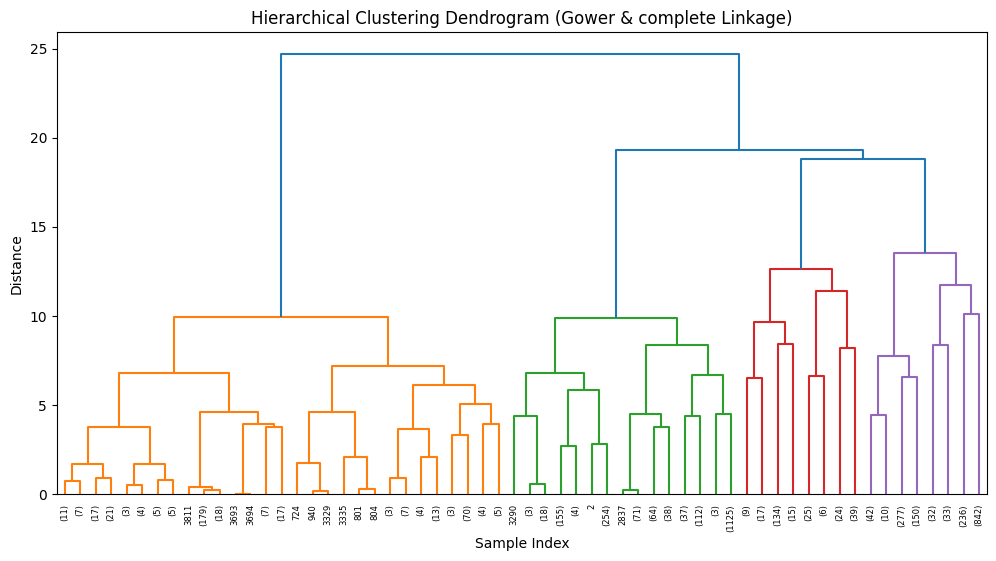

In [58]:
for col in Ori_df.select_dtypes(include='category').columns:
    Ori_df[col] = Ori_df[col].astype(str)

# Compute Gower distance matrix
gower_dist = gower.gower_matrix(Ori_df)

# Perform hierarchical clustering
Z = linkage(gower_dist, method='complete') 

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Gower & complete Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


Silhouette score for k=2: 0.4013
Silhouette score for k=3: 0.4278
Silhouette score for k=4: 0.5043
Silhouette score for k=5: 0.4526
Silhouette score for k=6: 0.4566
Silhouette score for k=7: 0.4579
Silhouette score for k=8: 0.4142
Silhouette score for k=9: 0.4100
Silhouette score for k=10: 0.4290


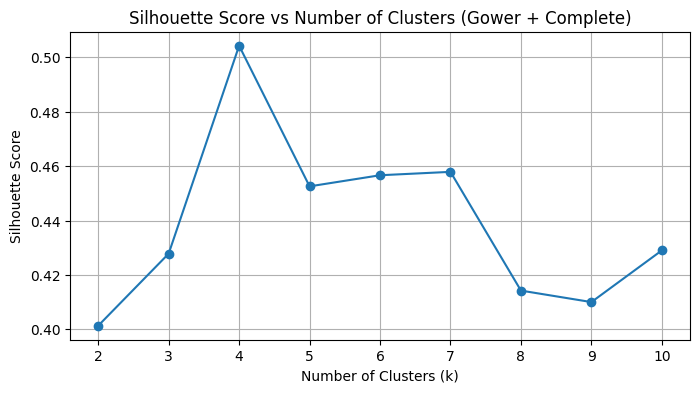

In [59]:

range_n_clusters = range(2, 11)
sil_scores = []

for k in range_n_clusters:
    labels = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(gower_dist, labels, metric='precomputed')
    sil_scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (Gower + Complete)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


### We can see that for complete linkage, k=4 is the apprpriate selection. Now let's check average.

C:\Users\houju\AppData\Local\Temp\ipykernel_49244\2007867103.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_2 = linkage(gower_dist, method='average')


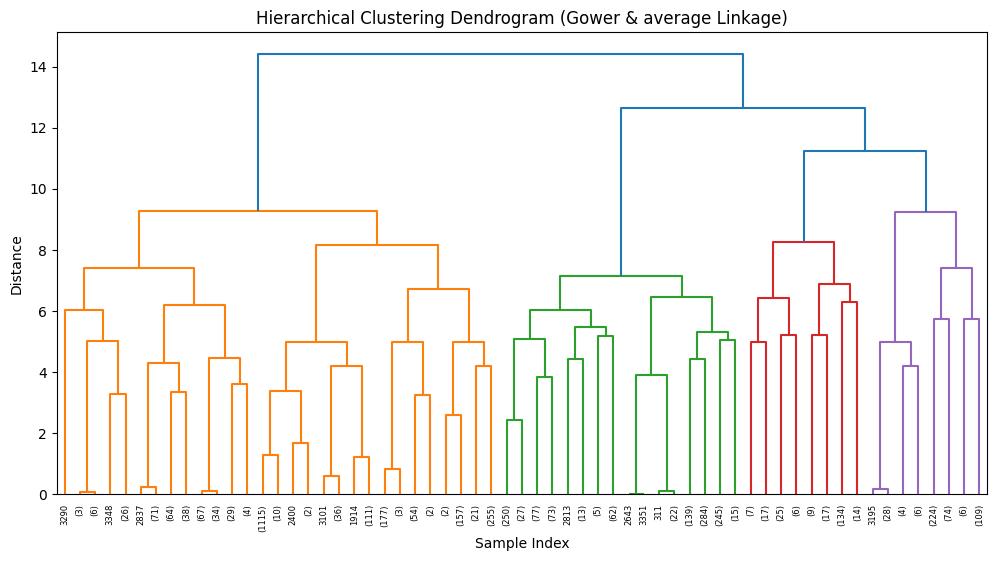

In [60]:
Z_2 = linkage(gower_dist, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z_2, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Gower & average Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

Silhouette score for k=2: 0.4255
Silhouette score for k=3: 0.4857
Silhouette score for k=4: 0.5011
Silhouette score for k=5: 0.4991
Silhouette score for k=6: 0.4717
Silhouette score for k=7: 0.4747
Silhouette score for k=8: 0.5117
Silhouette score for k=9: 0.5308
Silhouette score for k=10: 0.5176


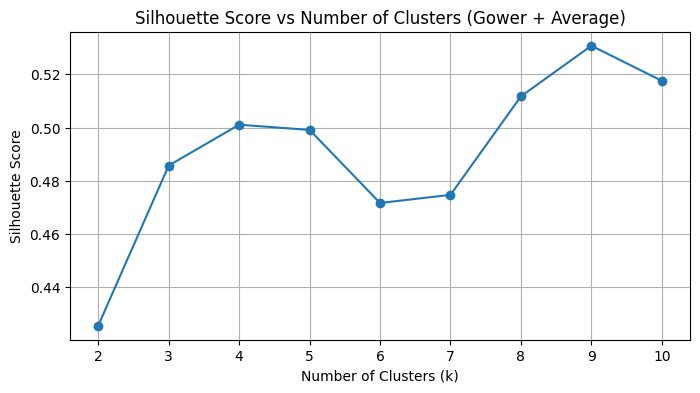

In [61]:

range_n_clusters = range(2, 11)
sil_scores = []

for k in range_n_clusters:
    labels = fcluster(Z_2, k, criterion='maxclust')
    score = silhouette_score(gower_dist, labels, metric='precomputed')
    sil_scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (Gower + Average)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


### We can choose either k=4 or k=5 from average linkage. After comparing clustering results and silhouette scores, We'll use k=5 with average linkage as our final choice.

In [62]:

# Choose best Z and best k
labels = fcluster(Z_2, t=5, criterion='maxclust')
Ori_df['Gower_Avg_Cluster'] = labels


<a name='Result'></a>

<div style= 'border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;'>

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
6. Cluster Result Visualization & Analysis </h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

### We'll use some charts to visualize the quality of our clusters, if any patterns are visiable and arrive at some conclusions with findings.

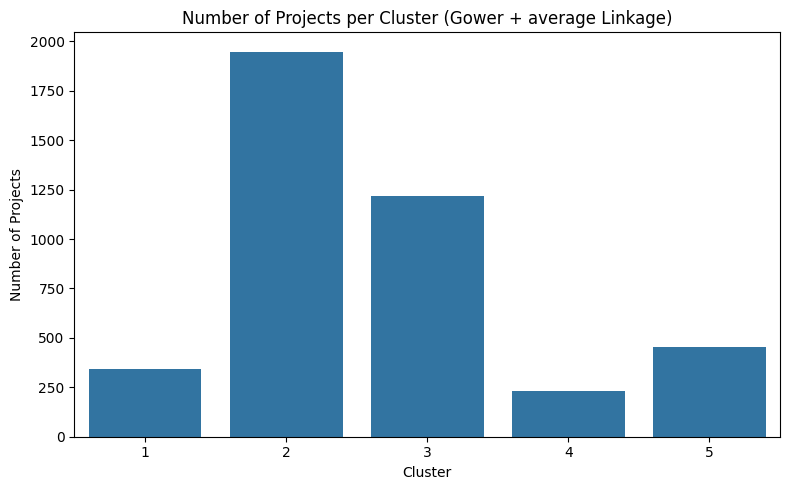

Gower_Avg_Cluster
1     345
2    1948
3    1216
4     229
5     452
Name: count, dtype: int64


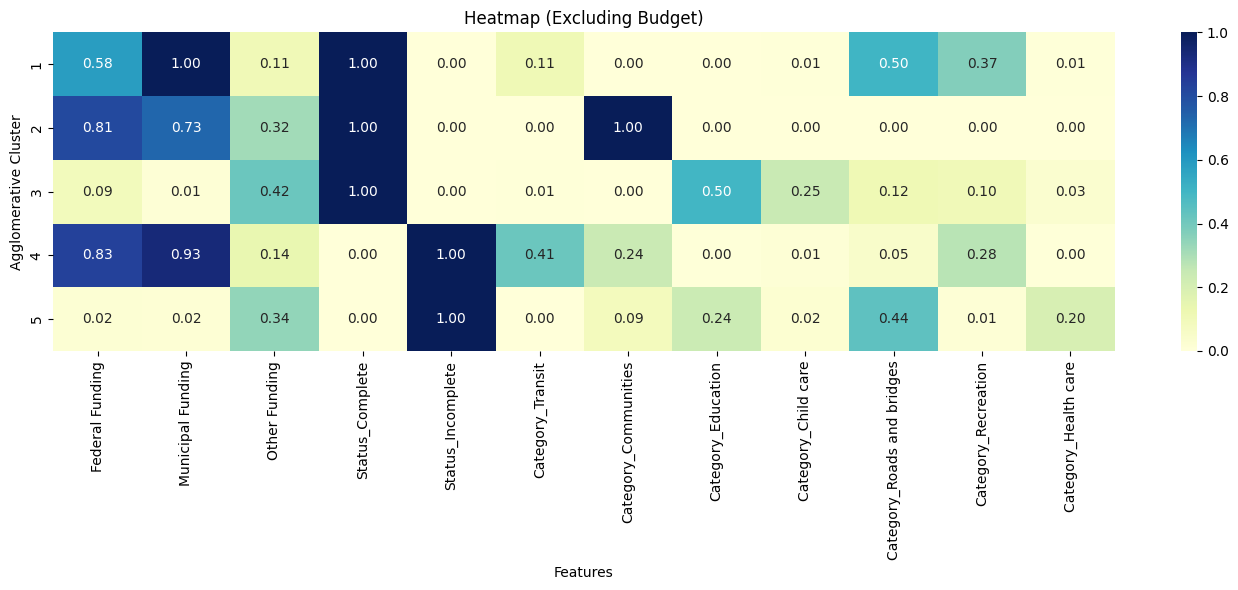

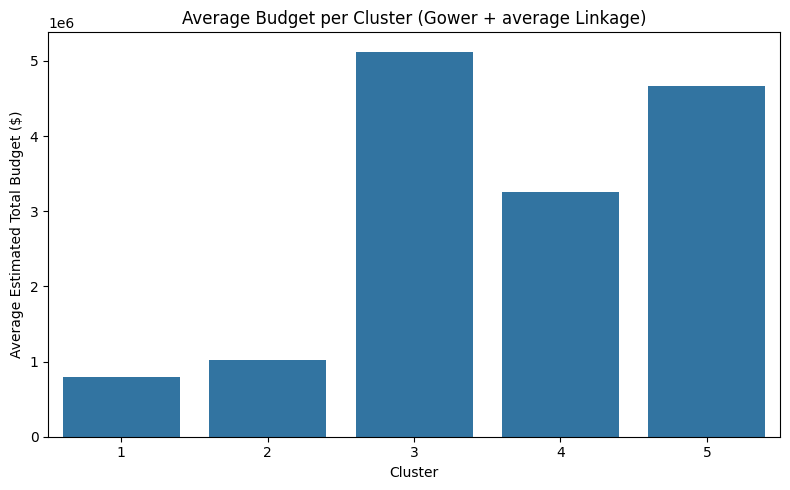

In [63]:

# 1. Bar chart – count of projects in each cluster
cluster_counts = Ori_df['Gower_Avg_Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sn.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel("Cluster")
plt.ylabel("Number of Projects")
plt.title("Number of Projects per Cluster (Gower + average Linkage)")
plt.tight_layout()
plt.show()
print(cluster_counts)

# 2. Heatmap – categorical breakdown (Category, Status, FundingType) by cluster

# Drop budget column before plotting (we only want categorical breakdown)
columns_to_drop = ['Estimated Total Budget ($)']
heatmap_input = Ori_df.drop(columns=columns_to_drop)

# Group by cluster and compute mean
cluster_means = heatmap_input.groupby('Gower_Avg_Cluster').mean()

# Plot heatmap
plt.figure(figsize=(14, 6))
sn.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Heatmap (Excluding Budget)")
plt.xlabel("Features")
plt.ylabel("Agglomerative Cluster")
plt.tight_layout()
plt.show()

# 3. Bar chart – average budget per cluster
avg_budget = Ori_df.groupby('Gower_Avg_Cluster')['Estimated Total Budget ($)'].mean()
plt.figure(figsize=(8, 5))
sn.barplot(x=avg_budget.index, y=avg_budget.values)
plt.xlabel("Cluster")
plt.ylabel("Average Estimated Total Budget ($)")
plt.title("Average Budget per Cluster (Gower + average Linkage)")
plt.tight_layout()
plt.show()


## Key Findings:
### Most Education, Health Care and Child care projects only have "Other funding", and these projects have higher budgets.
### Most Community projects have the lower budgets and receives both federal and municiple funding.
### About 96% Child care projects are complete, About 95% of Community projects are complete.
### Within expectation. Incomplete projects have higher budgets in general.

#### Note: We could do k=9 for more pattern discovery based on silhouette score, however it would be a lot harder to interpretate.

In [ ]:
Ori_df.to_excel("Ontario_Projects_Clusters.xlsx", index=False)